In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

C:\Users\LJENG\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df = pd.read_csv("Ice_cream selling data.csv")
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


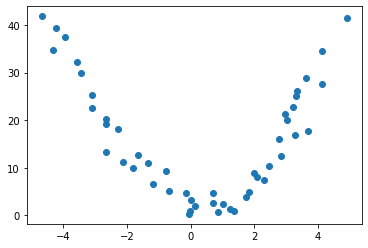

In [4]:
plt.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'])
plt.show()

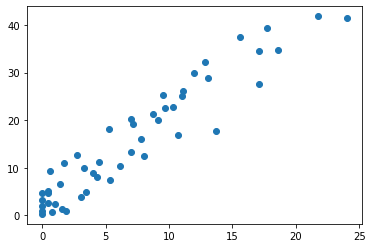

In [5]:
plt.scatter(df['Temperature (°C)']*df['Temperature (°C)'], df['Ice Cream Sales (units)'])
plt.show()

In [6]:
x = df[['Temperature (°C)']]
y = df['Ice Cream Sales (units)']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=10)

In [7]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x_train)
print(x_poly)

[[ 1.00000000e+00  2.95993209e+00  8.76119799e+00]
 [ 1.00000000e+00 -4.21398476e+00  1.77576676e+01]
 [ 1.00000000e+00  3.02087431e+00  9.12568162e+00]
 [ 1.00000000e+00  1.99931037e+00  3.99724195e+00]
 [ 1.00000000e+00 -2.65149803e+00  7.03044182e+00]
 [ 1.00000000e+00 -3.38952856e-02  1.14889038e-03]
 [ 1.00000000e+00  2.47194600e+00  6.11051701e+00]
 [ 1.00000000e+00  1.02418081e+00  1.04894634e+00]
 [ 1.00000000e+00 -6.73752802e-01  4.53942838e-01]
 [ 1.00000000e+00  1.85055193e+00  3.42454243e+00]
 [ 1.00000000e+00 -4.31655945e+00  1.86326855e+01]
 [ 1.00000000e+00 -2.11186969e+00  4.45999359e+00]
 [ 1.00000000e+00  2.31859124e+00  5.37586534e+00]
 [ 1.00000000e+00  3.61077848e+00  1.30377212e+01]
 [ 1.00000000e+00  8.74905029e-01  7.65458810e-01]
 [ 1.00000000e+00 -3.45571170e+00  1.19419433e+01]
 [ 1.00000000e+00 -1.81893761e+00  3.30853403e+00]
 [ 1.00000000e+00  8.60769873e-03  7.40924775e-05]
 [ 1.00000000e+00 -1.49634867e-01  2.23905933e-02]
 [ 1.00000000e+00 -7.73330043e-

In [8]:
model = LinearRegression()
model.fit(x_poly, y_train)
y_pred = model.predict(poly.fit_transform(x_test))
print("Mean Squared Error = ",mean_squared_error(y_test,y_pred))
print("R2 Score = ",r2_score(y_test, y_pred))

Mean Squared Error =  11.186143275103136
R2 Score =  0.9300570976550554


In [9]:
r2 = []
r_score = 0
for i in range(1,16):
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x_train)
    model = LinearRegression()
    model.fit(x_poly, y_train)
    y_pred = model.predict(poly.fit_transform(x_test))
    r_new = r2_score(y_test, y_pred)
    r2.append(r_new)
    if r_new > r_score:
        deg = i
        r_score = r_new
        y_4 = model.predict(poly.fit_transform(np.array([[4]])))
        
print(deg, r_score, y_4)

6 0.9496296635022199 [30.18722737]


In [10]:
LinearRegression??

In [11]:
mean_squared_error??

In [12]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [13]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [14]:
y = df['Weight']
x = df[['Length1','Length2','Length3','Width','Height']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=10)
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x_train)
print(x_poly)


model = LinearRegression()
model.fit(x_poly, y_train)
y_pred = model.predict(poly.fit_transform(x_test))
print("Mean Squared Error = ",mean_squared_error(y_test,y_pred))
print("R2 Score = ",r2_score(y_test, y_pred))


r2 = []
r_score = 0
for i in range(1,16):
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x_train)
    model = LinearRegression()
    model.fit(x_poly, y_train)
    y_pred = model.predict(poly.fit_transform(x_test))
    r_new = r2_score(y_test, y_pred)
    r2.append(r_new)
    if r_new > r_score:
        deg = i
        r_score = r_new
        y_4 = model.predict(poly.fit_transform(np.array([[12,13,15,17,12]])))
        
print(deg, r_score, y_4)

[[  1.          39.8         43.         ...  52.95763984  86.83737216
  142.39171584]
 [  1.          22.          23.4        ...  13.18561344  25.11083736
   47.82137409]
 [  1.          19.8         21.5        ...   9.96728041  30.73878844
   94.79748496]
 ...
 [  1.          29.4         32.         ...  31.1364      86.14404
  238.331844  ]
 [  1.          40.1         43.         ...  55.00447225  92.79895625
  156.56265625]
 [  1.          28.5         30.7        ...  24.59564836  70.55540004
  202.39614756]]
Mean Squared Error =  1494.4141886613347
R2 Score =  0.9610294344029817
2 0.9610294344029817 [1419.56927587]
